<a href="https://colab.research.google.com/github/guoxin1990/SharpSCADA/blob/master/DINOv2/Fine_tune_DINOv2_for_image_classification_%5Bminimal%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set-up environment

In [1]:
!pip install -q transformers[torch] datasets

In [18]:
# see https://twitter.com/huggingface/status/1737533693906870668
# which now enables to automatically login :)
!pip install -q --upgrade huggingface_hub

## Load dataset

In [2]:
from datasets import load_dataset

# see https://huggingface.co/docs/datasets/image_dataset to load your own custom dataset
dataset = load_dataset("timm/oxford-iiit-pet")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label', 'image_id', 'label_cat_dog'],
        num_rows: 3680
    })
    test: Dataset({
        features: ['image', 'label', 'image_id', 'label_cat_dog'],
        num_rows: 3669
    })
})

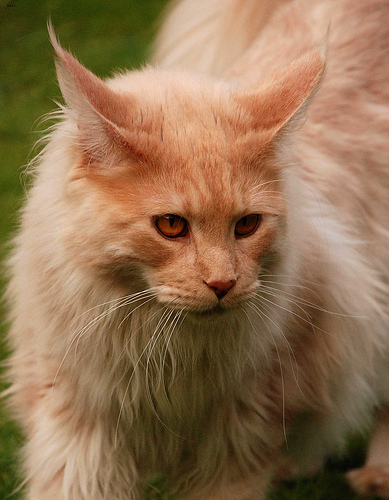

In [4]:
example = dataset["train"][0]
example["image"]

In [5]:
example["label"]

20

In [6]:
labels = dataset["train"].features["label"].names
id2label = {id: label for id, label in enumerate(labels)}
label2id = {label: id for id, label in enumerate(labels)}
print(id2label)

{0: 'abyssinian', 1: 'american_bulldog', 2: 'american_pit_bull_terrier', 3: 'basset_hound', 4: 'beagle', 5: 'bengal', 6: 'birman', 7: 'bombay', 8: 'boxer', 9: 'british_shorthair', 10: 'chihuahua', 11: 'egyptian_mau', 12: 'english_cocker_spaniel', 13: 'english_setter', 14: 'german_shorthaired', 15: 'great_pyrenees', 16: 'havanese', 17: 'japanese_chin', 18: 'keeshond', 19: 'leonberger', 20: 'maine_coon', 21: 'miniature_pinscher', 22: 'newfoundland', 23: 'persian', 24: 'pomeranian', 25: 'pug', 26: 'ragdoll', 27: 'russian_blue', 28: 'saint_bernard', 29: 'samoyed', 30: 'scottish_terrier', 31: 'shiba_inu', 32: 'siamese', 33: 'sphynx', 34: 'staffordshire_bull_terrier', 35: 'wheaten_terrier', 36: 'yorkshire_terrier'}


In [7]:
!huggingface-cli login

⚠️  Warning: 'huggingface-cli login' is deprecated. Use 'hf auth login' instead.

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `hf auth whoami` to get more information or `hf auth logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add t

In [8]:
!hf auth login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `hf auth whoami` to get more information or `hf auth logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: fineGrained).
The tok

In [9]:
pip install --upgrade transformers

## Load the model

In [10]:
from transformers import AutoImageProcessor, AutoModelForImageClassification

model_name = "facebook/dinov3-vits16-pretrain-lvd1689m"
processor = AutoImageProcessor.from_pretrained(model_name)
model = AutoModelForImageClassification.from_pretrained(model_name, id2label=id2label, label2id=label2id)

`use_fast` is set to `True` but the image processor class does not have a fast version.  Falling back to the slow version.


ValueError: Unrecognized image processor in facebook/dinov3-vits16-pretrain-lvd1689m. Should have a `image_processor_type` key in its preprocessor_config.json of config.json, or one of the following `model_type` keys in its config.json: aimv2, aimv2_vision_model, align, aria, beit, bit, blip, blip-2, bridgetower, chameleon, chinese_clip, clip, clipseg, cohere2_vision, conditional_detr, convnext, convnextv2, cvt, data2vec-vision, deepseek_vl, deepseek_vl_hybrid, deformable_detr, deit, depth_anything, depth_pro, deta, detr, dinat, dinov2, donut-swin, dpt, efficientformer, efficientloftr, efficientnet, eomt, flava, focalnet, fuyu, gemma3, gemma3n, git, glm4v, glpn, got_ocr2, grounding-dino, groupvit, hiera, idefics, idefics2, idefics3, ijepa, imagegpt, instructblip, instructblipvideo, janus, kosmos-2, layoutlmv2, layoutlmv3, levit, lightglue, llama4, llava, llava_next, llava_next_video, llava_onevision, mask2former, maskformer, mgp-str, mistral3, mlcd, mllama, mm-grounding-dino, mobilenet_v1, mobilenet_v2, mobilevit, mobilevitv2, nat, nougat, oneformer, owlv2, owlvit, paligemma, perceiver, perception_lm, phi4_multimodal, pix2struct, pixtral, poolformer, prompt_depth_anything, pvt, pvt_v2, qwen2_5_vl, qwen2_vl, regnet, resnet, rt_detr, sam, sam_hq, segformer, seggpt, shieldgemma2, siglip, siglip2, smolvlm, superglue, superpoint, swiftformer, swin, swin2sr, swinv2, table-transformer, timesformer, timm_wrapper, tvlt, tvp, udop, upernet, van, videomae, vilt, vipllava, vit, vit_hybrid, vit_mae, vit_msn, vitmatte, xclip, yolos, zoedepth

In [12]:
import transformers
print(transformers.__version__)

4.55.4


from transformers import Dinov2ImageProcessor, AutoModel
from PIL import Image
import requests

# 加载图像处理器
processor = Dinov2ImageProcessor.from_pretrained("facebook/dinov3-vits16-pretrain-lvd1689m")

# 加载模型
model = AutoModel.from_pretrained("facebook/dinov3-vits16-pretrain-lvd1689m")

# 准备图像
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

# 预处理
inputs = processor(images=image, return_tensors="pt")

# 推理
import torch
with torch.no_grad():
    outputs = model(**inputs)
    features = outputs.last_hidden_state

print("输出特征形状:", features.shape)  # [1, 197, 384]

In [25]:
import torch
from transformers import AutoImageProcessor, AutoModel
from transformers.image_utils import load_image

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = load_image(url)

pretrained_model_name = "facebook/dinov3-vits16-pretrain-lvd1689m"
processor = AutoImageProcessor.from_pretrained(pretrained_model_name)
model = AutoModel.from_pretrained(
    pretrained_model_name,
    device_map="auto",
)

inputs = processor(images=image, return_tensors="pt").to(model.device)
with torch.inference_mode():
    outputs = model(**inputs)

pooled_output = outputs.pooler_output
print("Pooled output shape:", pooled_output.shape)

ValueError: Unrecognized image processor in facebook/dinov3-vits16-pretrain-lvd1689m. Should have a `image_processor_type` key in its preprocessor_config.json of config.json, or one of the following `model_type` keys in its config.json: aimv2, aimv2_vision_model, align, aria, beit, bit, blip, blip-2, bridgetower, chameleon, chinese_clip, clip, clipseg, cohere2_vision, conditional_detr, convnext, convnextv2, cvt, data2vec-vision, deepseek_vl, deepseek_vl_hybrid, deformable_detr, deit, depth_anything, depth_pro, deta, detr, dinat, dinov2, donut-swin, dpt, efficientformer, efficientloftr, efficientnet, eomt, flava, focalnet, fuyu, gemma3, gemma3n, git, glm4v, glpn, got_ocr2, grounding-dino, groupvit, hiera, idefics, idefics2, idefics3, ijepa, imagegpt, instructblip, instructblipvideo, janus, kosmos-2, layoutlmv2, layoutlmv3, levit, lightglue, llama4, llava, llava_next, llava_next_video, llava_onevision, mask2former, maskformer, mgp-str, mistral3, mlcd, mllama, mm-grounding-dino, mobilenet_v1, mobilenet_v2, mobilevit, mobilevitv2, nat, nougat, oneformer, owlv2, owlvit, paligemma, perceiver, perception_lm, phi4_multimodal, pix2struct, pixtral, poolformer, prompt_depth_anything, pvt, pvt_v2, qwen2_5_vl, qwen2_vl, regnet, resnet, rt_detr, sam, sam_hq, segformer, seggpt, shieldgemma2, siglip, siglip2, smolvlm, superglue, superpoint, swiftformer, swin, swin2sr, swinv2, table-transformer, timesformer, timm_wrapper, tvlt, tvp, udop, upernet, van, videomae, vilt, vipllava, vit, vit_hybrid, vit_mae, vit_msn, vitmatte, xclip, yolos, zoedepth

## Prepare dataset for the model

In [ ]:
from torchvision.transforms import Compose, RandomResizedCrop, RandomHorizontalFlip, ColorJitter, ToTensor, Normalize
import torch

# make sure to use the appropriate image mean, std and interpolation
# of the inference processor
mean = processor.image_mean
std = processor.image_std
interpolation = processor.resample

# for training, we use some image transformations from Torchvision
# feel free to use other libraries like Albumentations or Kornia here
train_transform = Compose([
    RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=interpolation),
    RandomHorizontalFlip(p=0.5),
    ColorJitter(brightness=(0.6, 1.4), contrast=(0.6, 1.4), saturation=(0.6, 1.4)),
    ToTensor(),
    Normalize(mean=mean, std=std),
])

In [ ]:
def prepare(batch, mode="train"):
  # get images
  images = batch["image"]

  # prepare for the model
  if mode == "train":
    images = [train_transform(image.convert("RGB")) for image in images]
    pixel_values = torch.stack(images)
  elif mode == "test":
    pixel_values = processor(images, return_tensors="pt").pixel_values
  else:
    raise ValueError(f"Mode {mode} not supported")

  inputs = {}
  inputs["pixel_values"] = pixel_values
  inputs["labels"] = torch.tensor(batch["label"])

  return inputs

# set num_proc equal to the number of CPU cores on your machine
# see https://docs.python.org/3/library/multiprocessing.html#multiprocessing.cpu_count
train_dataset = dataset["train"].map(prepare, num_proc=2, batched=True, batch_size=20, fn_kwargs={"mode":"train"})
eval_dataset = dataset["test"].map(prepare, num_proc=2, batched=True, batch_size=20, fn_kwargs={"mode":"test"})

In [ ]:
train_dataset.set_format("torch")
eval_dataset.set_format("torch")

In [ ]:
train_dataset[0]["pixel_values"].shape

torch.Size([3, 224, 224])

In [ ]:
train_dataset[0]["labels"]

tensor(20)

## Train the model

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# the compute_metrics function takes a Named Tuple as input:
# predictions, which are the logits of the model as Numpy arrays,
# and label_ids, which are the ground-truth labels as Numpy arrays.
def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions"""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    accuracy = accuracy_score(y_pred=predictions, y_true=eval_pred.label_ids)
    return {"accuracy": accuracy}

In [ ]:
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    f"{model_name}-finetuned-oxford",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=4,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=True,
)

In [ ]:
import torch

def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

trainer = Trainer(
    model,
    args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=processor,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.985500,0.596194,0.801036
2,0.426100,0.488605,0.853639
3,0.096300,0.266184,0.922050


TrainOutput(global_step=690, training_loss=0.7261388156293095, metrics={'train_runtime': 1132.513, 'train_samples_per_second': 9.748, 'train_steps_per_second': 0.609, 'total_flos': 8.638588166868173e+17, 'train_loss': 0.7261388156293095, 'epoch': 3.0})

In [ ]:
!pip show torch

Name: torch
Version: 2.1.0+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, triton, typing-extensions
Required-by: accelerate, fastai, torchaudio, torchdata, torchtext, torchvision
